In [1]:
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:100% !important; }</style>"))

In [2]:
%load_ext autoreload

In [3]:
%autoreload 2

In [4]:
from IPython.core.debugger import set_trace

In [5]:
from utils import get_X_and_Y, rgb_frame, make_rgb_movie, find_waypoints


DECIMATION = 2
BATCH_SIZE = 32

CAMERA_IDS = [
    'FrontSS', 'LeftSS', 'RightSS', 'RearSS', 'TopSS'
]

CLASSES_NAMES = [
    ['Roads', 'RoadLines'],
    
    ['None', 'Buildings', 'Fences', 'Other', 'Pedestrians',
     'Poles', 'Walls', 'TrafficSigns',
     'Vegetation', 'Sidewalks'],
    
    ['Vehicles'],
]

pygame 1.9.4
Hello from the pygame community. https://www.pygame.org/contribute.html


Using TensorFlow backend.


In [6]:
import keras.backend as K
from keras.models import Model, load_model
from keras.layers import Input


multi_model = load_model('models/multi_model__sweep=23_decimation=2_numclasses=3_valloss=0.044.h5')

one_inp_shape = K.int_shape(multi_model.input[0])[1:]
inp = [
    multi_model.inputs[inp_idx] for inp_idx, inp_name in enumerate(CAMERA_IDS) if 'Top' not in inp_name
]

out = multi_model.get_layer('reconstruction').output

birds_view_model = Model(inp, out)

In [7]:
birds_view_model.summary()

__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_from_FrontSS (InputLayer) (None, 96, 144, 3)   0                                            
__________________________________________________________________________________________________
input_from_LeftSS (InputLayer)  (None, 96, 144, 3)   0                                            
__________________________________________________________________________________________________
input_from_RightSS (InputLayer) (None, 96, 144, 3)   0                                            
__________________________________________________________________________________________________
input_from_RearSS (InputLayer)  (None, 96, 144, 3)   0                                            
__________________________________________________________________________________________________
encoder_su

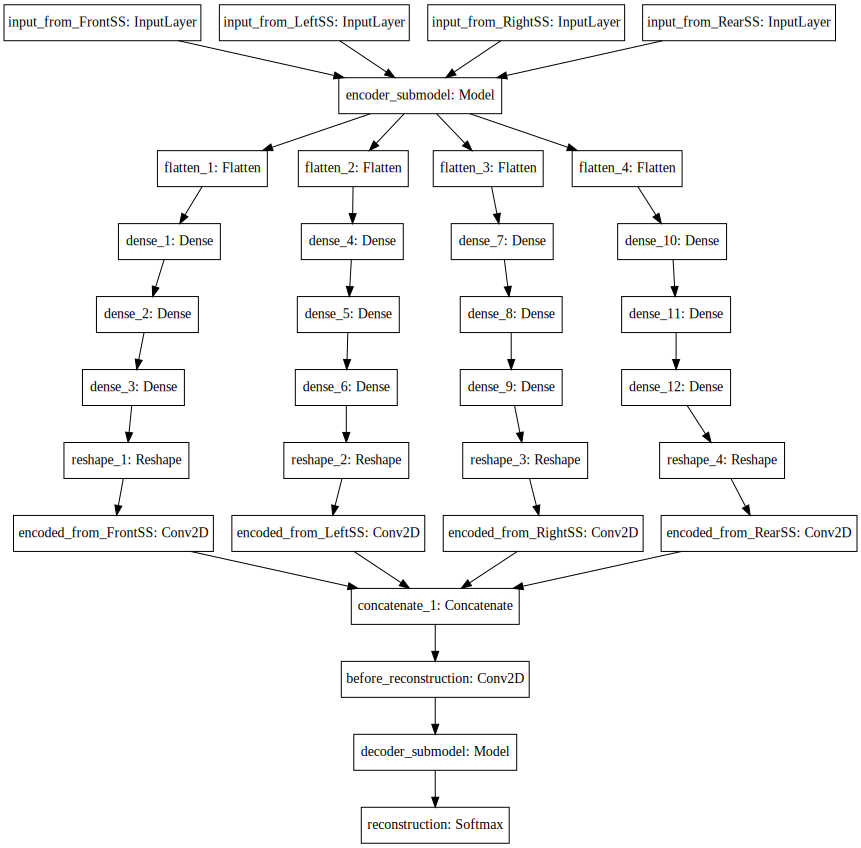

In [8]:
from IPython.display import SVG
from keras.utils.vis_utils import model_to_dot, plot_model


plot_model(birds_view_model, to_file='images/birds_view_model.png')#, show_shapes=True)
SVG(model_to_dot(birds_view_model).create(prog='dot', format='svg'))

[MoviePy] >>>> Building video movies/birds_view_model__racetrack=Town01_episode=102_RGB.mp4
[MoviePy] Writing video movies/birds_view_model__racetrack=Town01_episode=102_RGB.mp4


100%|█████████▉| 1000/1001 [00:43<00:00, 22.82it/s]


[MoviePy] Done.
[MoviePy] >>>> Video ready: movies/birds_view_model__racetrack=Town01_episode=102_RGB.mp4 

[MoviePy] >>>> Building video movies/birds_view_model__racetrack=Town01_episode=103_RGB.mp4
[MoviePy] Writing video movies/birds_view_model__racetrack=Town01_episode=103_RGB.mp4


 55%|█████▍    | 546/1001 [00:23<00:20, 22.70it/s]

KeyboardInterrupt: 

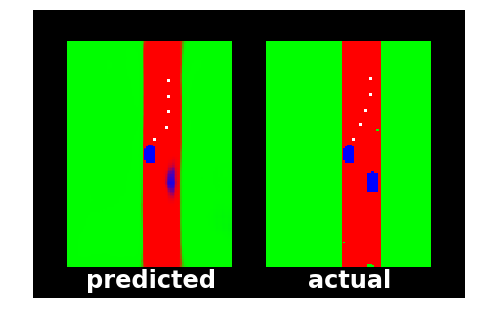

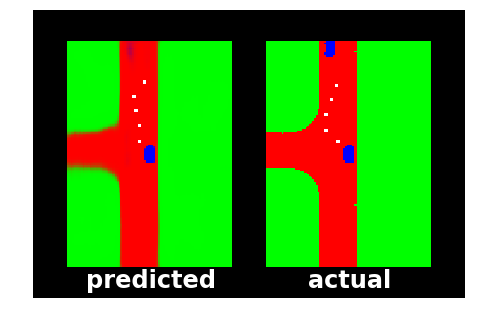

In [12]:
for racetrack in ['Town01', 'Town02']:
    for episode in [102, 103]:
        make_rgb_movie(birds_view_model, racetrack, episode, DECIMATION, CLASSES_NAMES, CAMERA_IDS)

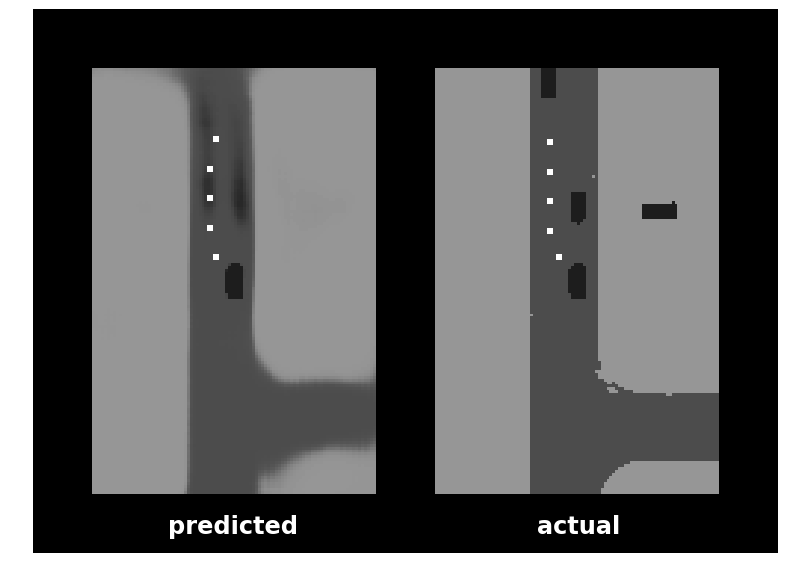

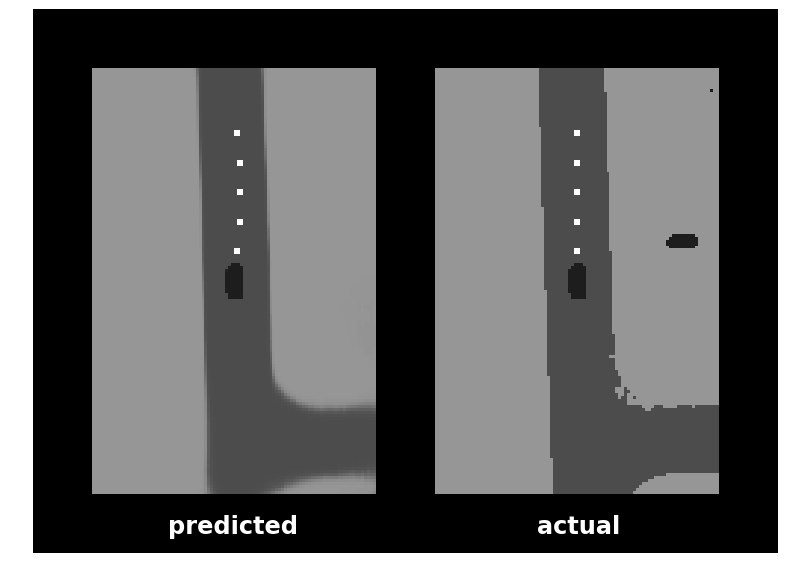

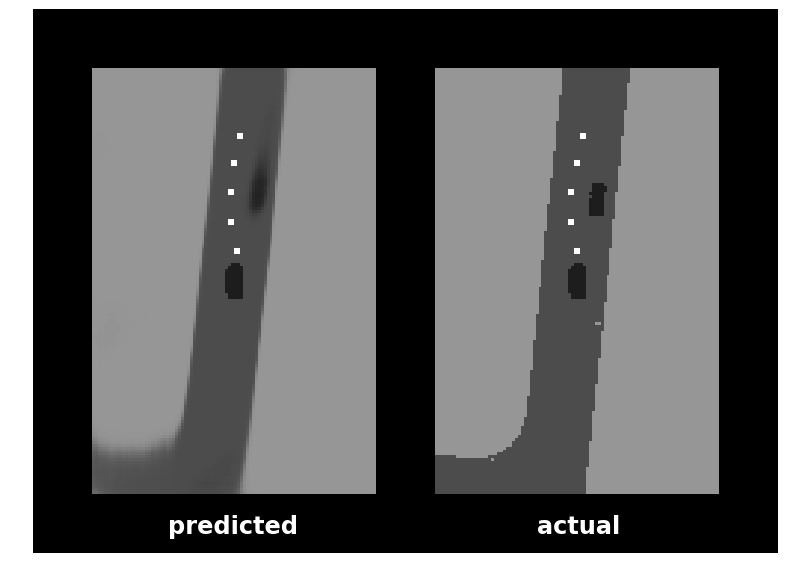

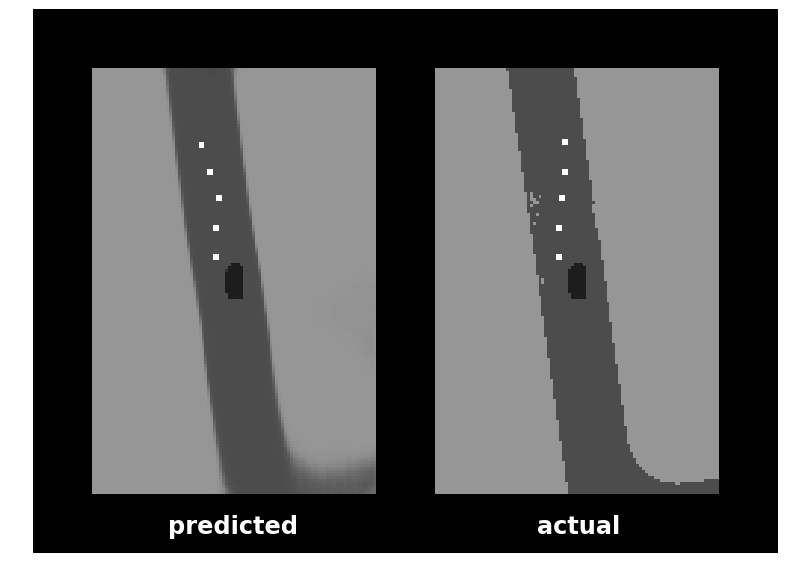

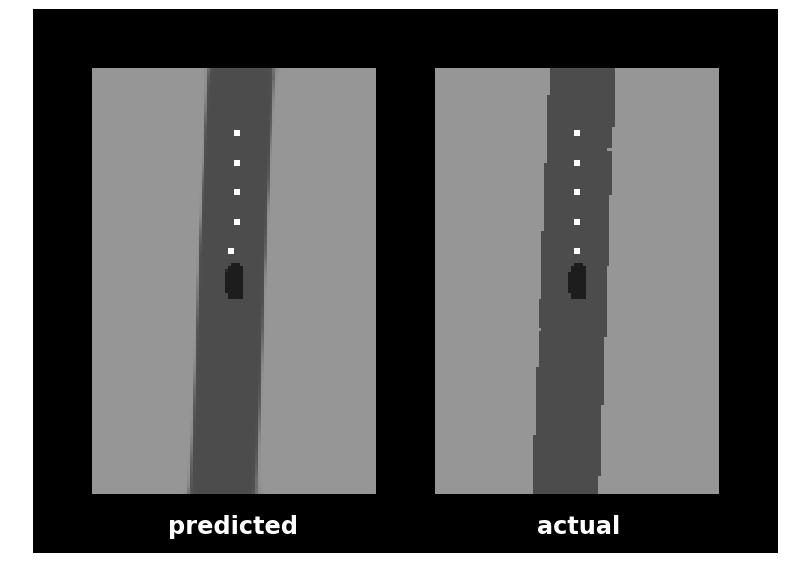

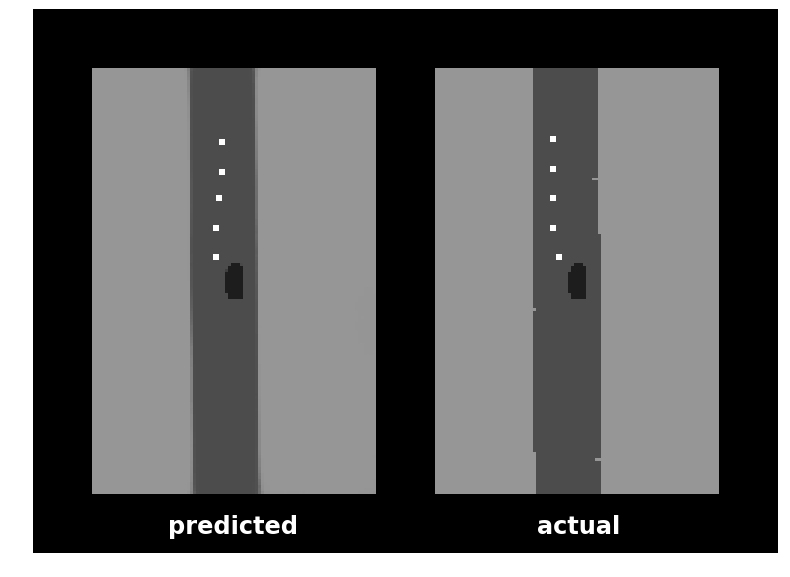

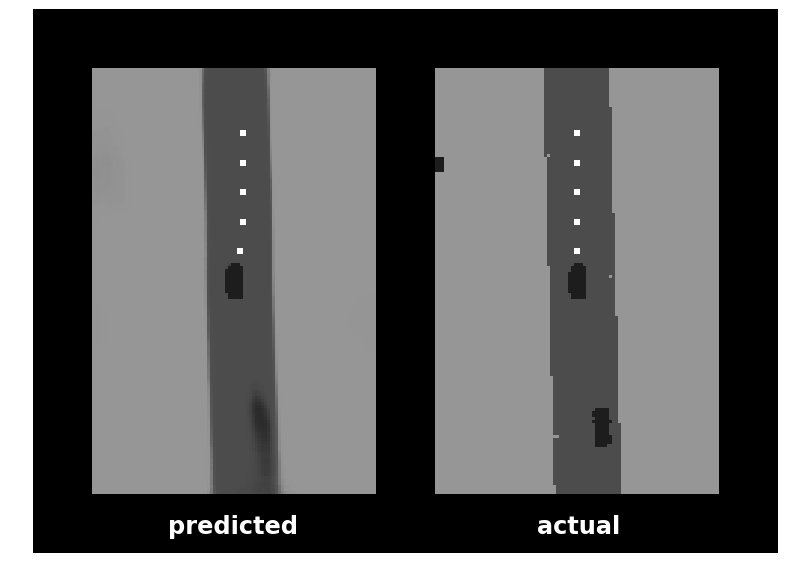

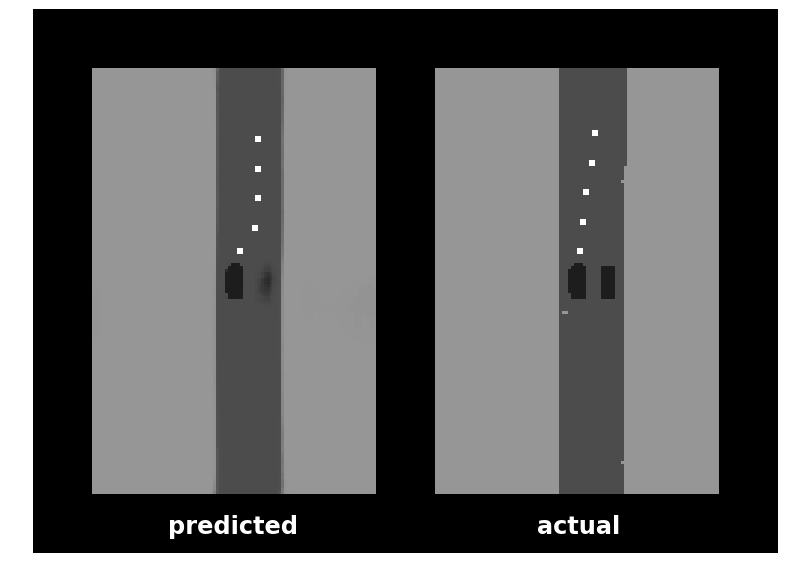

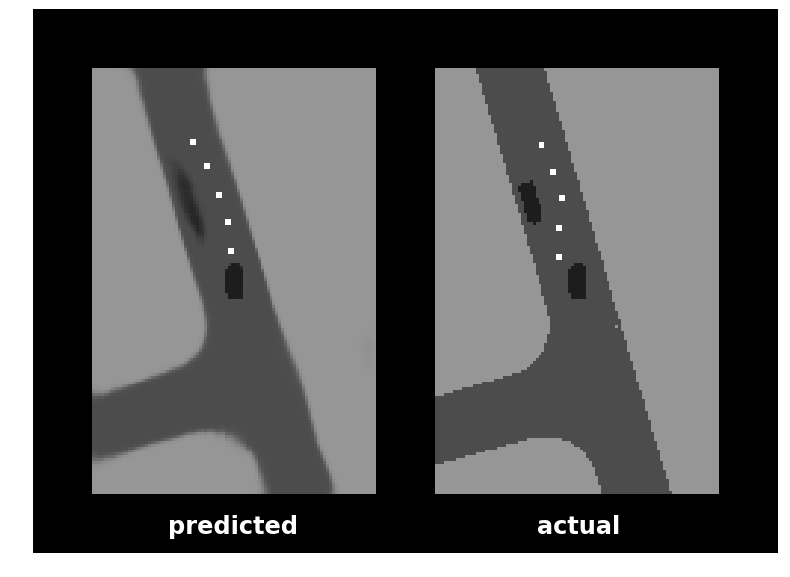

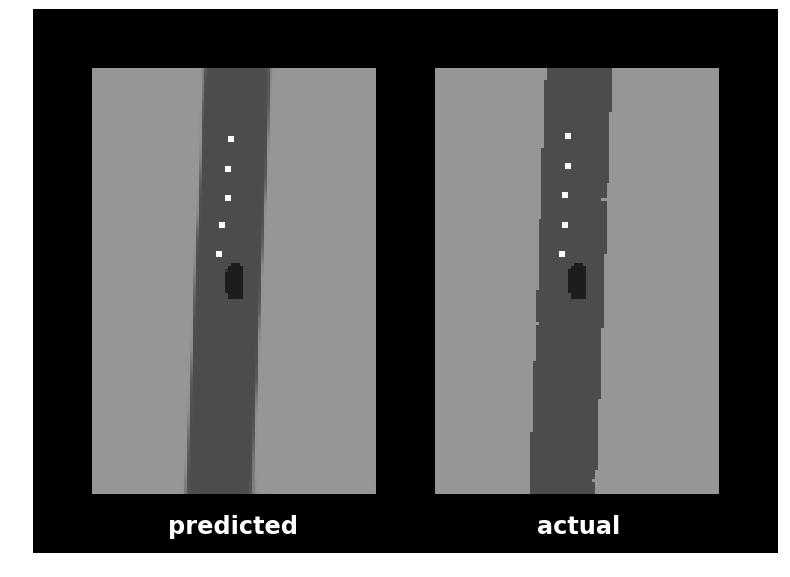

In [17]:
import numpy as np
import matplotlib.pyplot as plt
from utils import class_names_to_class_numbers, extract_observation_for_batch


racetrack = 'Town01'
episode = 102
decimation = DECIMATION
camera_ids = CAMERA_IDS
classes_names = CLASSES_NAMES
episode_len = 1000
batch_size = 32


storage = get_X_and_Y([racetrack], [episode], decimation, camera_ids)
X = [storage[id_] for id_ in camera_ids if 'Top' not in id_]
Y = [storage[id_] for id_ in camera_ids if 'Top' in id_][0]

classes_numbers = class_names_to_class_numbers(classes_names)

X_final, y_final = [[] for _ in range(4)], []
for index in range(episode_len):
    X_out, y_out = extract_observation_for_batch(X, Y, index, False, classes_numbers)
    for j in range(len(X_final)):
        X_final[j].append(X_out[j])
    y_final.append(y_out)

X_final = [np.stack(x) for x in X_final]
y_final = np.stack(y_final)

preds = birds_view_model.predict(X_final, batch_size=batch_size)


for i in range(0, 1000, 100):
    frame = rgb_frame(preds, y_final, i, draw_waypoints=True)
    plt.figure(figsize=(40, 10))
#     frame = np.dot(frame, [0.2989, 0.5870, 0.1140])
    plt.imshow(frame)
    plt.text(45, 177, 'predicted', color='white', fontsize=24, fontweight='bold')
    plt.text(170, 177, 'actual', color='white', fontsize=24, fontweight='bold')
    plt.axis('off')
    plt.show()

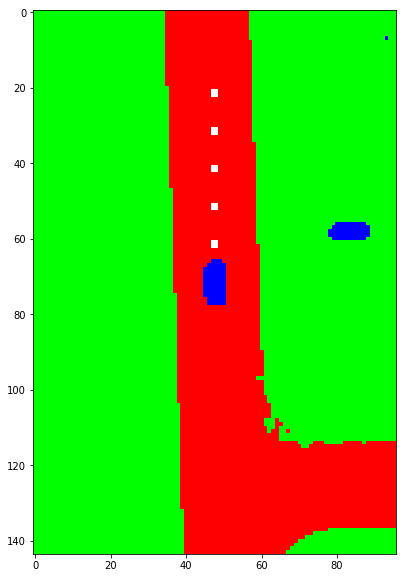

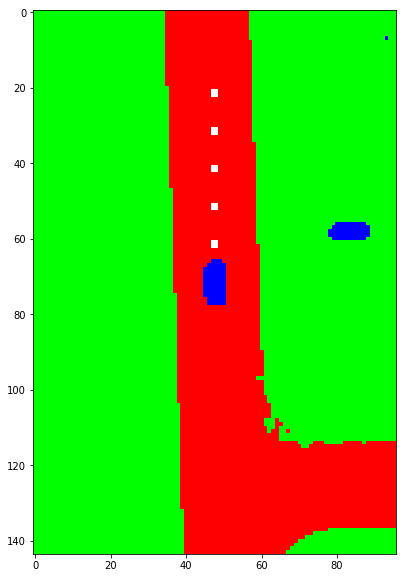

In [11]:
from numpy.linalg import norm


frame = np.flipud(np.transpose(y_final[100].copy(), axes=[1, 0, 2]))

plt.figure(figsize=(40, 10))
plt.imshow(frame.astype('float32'))
plt.show()


which_class = 0
max_angle = 40 * np.pi / 180
num_angles = 12
steps = 5
step_len = 12
sphere_radius = 7





waypoints, frame = find_waypoints(frame)
plt.figure(figsize=(40, 10))
plt.imshow(frame.astype('float32'))
plt.show()